# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [4]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [5]:
# Análise Inicial
print(base.info())
print(base.describe())
print(base.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB
None
                age        gender        height   cholesterol          gluc  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      53.288300      1.345400    164.308200      1.365000      1.222200   
std        6.796234      0.475522      8.178796      0.677658      0.5

Por mais que as colunas de altura, peso e glicose possam apresentar um princípio de outlier, manter esses dados é essencial, pois representam variações reais e clinicamente relevantes para o modelo.

# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


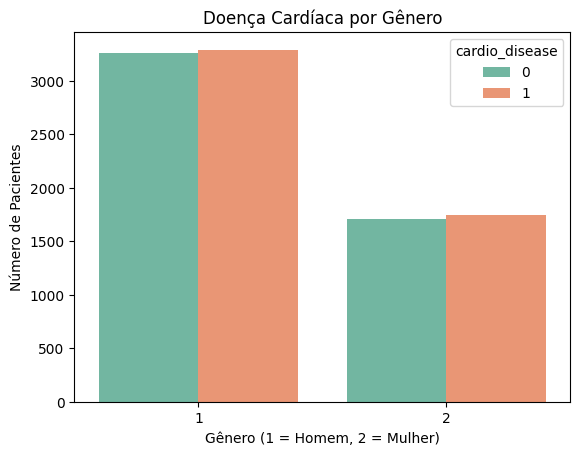

In [6]:
# Distribuição por Gênero

sns.countplot(x='gender', hue='cardio_disease', data=base, palette='Set2')
plt.title('Doença Cardíaca por Gênero')
plt.xlabel('Gênero (1 = Homem, 2 = Mulher)')
plt.ylabel('Número de Pacientes')
plt.show()

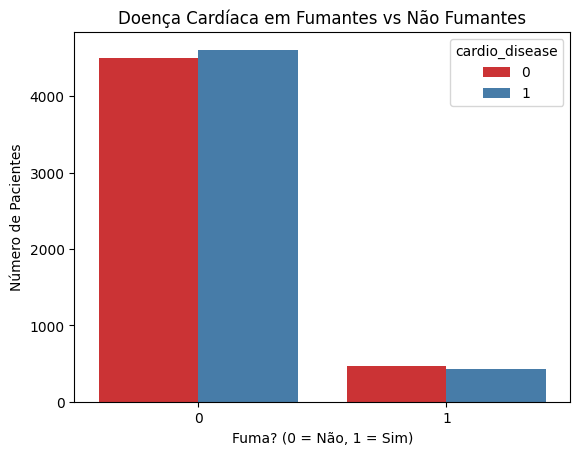

In [7]:
# Distribuição entre os fumantes

sns.countplot(x='smoke', hue='cardio_disease', data=base, palette='Set1')
plt.title('Doença Cardíaca em Fumantes vs Não Fumantes')
plt.xlabel('Fuma? (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pacientes')
plt.show()

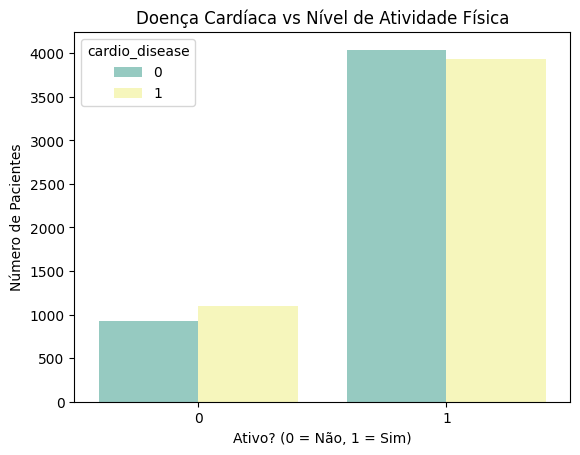

In [8]:
# Distribuição entre quem pratica atividade física

sns.countplot(x='active', hue='cardio_disease', data=base, palette='Set3')
plt.title('Doença Cardíaca vs Nível de Atividade Física')
plt.xlabel('Ativo? (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pacientes')
plt.show()

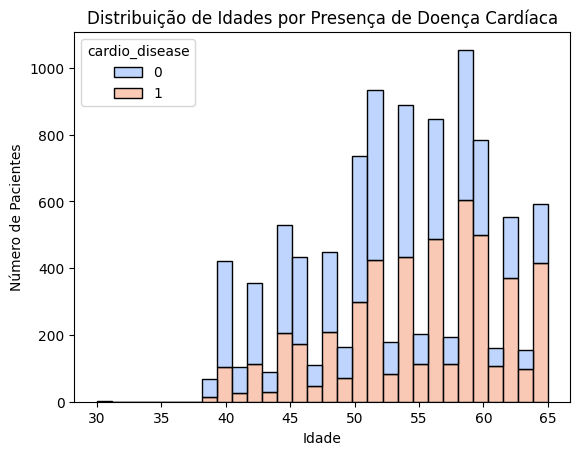

In [9]:
# Distruibuição entre a idade e a doença

sns.histplot(data=base, x='age', hue='cardio_disease', multiple='stack', bins=30, palette='coolwarm')
plt.title('Distribuição de Idades por Presença de Doença Cardíaca')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.show()

# Insights:

1° Gráfico - Gênero vs. Doença Cardíaca: A ocorrência de doenças cardiovasculares está relativamente equilibrada entre os gêneros, mas com leve predominância entre homens;

2° Gráfico - Fumo vs. Doença Cardíaca: Apesar de o número de fumantes ser bem menor na amostra, a proporção de casos de doença cardíaca entre eles é semelhante à dos não fumantes. Isso sugere que o tabagismo pode não ser o fator isolado mais determinante;

3° Gráfico - Atividade Física vs. Doença Cardíaca: Pacientes ativos apresentaram menor incidência de doenças cardíacas, reforçando que hábitos físicos regulares têm papel protetivo. A diferença entre os grupos sugere uma tendência clara: sedentarismo pode estar associado a maior risco cardiovascular.


4° Gráfico - Idade vs. Doença Cardíaca: Com o avanço da idade, aumenta também a proporção de pacientes com doença cardíaca, especialmente após os 50 anos, onde o número de casos positivos supera o de negativos. Isso reforça a idade como fator de risco importante.

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



In [10]:
# Essa troca foi necessária pois estava dando erro de string

for col in base.columns:
    if base[col].dtype == 'object':
        try:
            base[col] = base[col].str.replace(',', '.').astype(float)
        except:
            pass

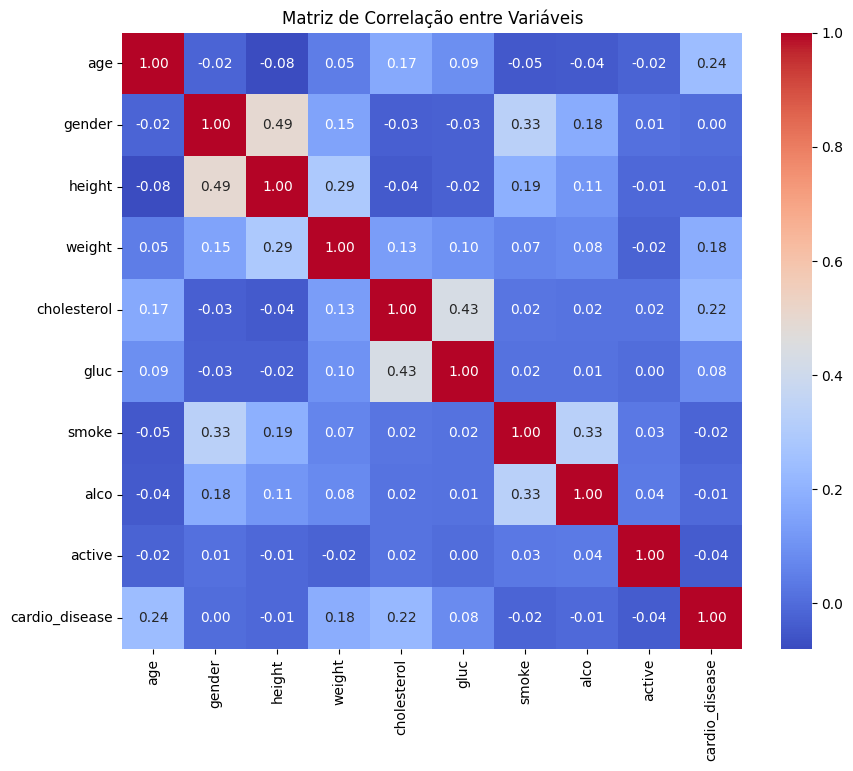

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(base.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

# Análise:

- Idade tem uma correlação moderada com 'cardio_disease', reforçando que o risco cardiovascular aumenta com o tempo;

- Peso e Altura estão fortemente correlacionados entre si, vistoque são proporções relacionadas.

- Glucose também apresenta alguma associação com doenças cardíacas, possível ligação com diabetes.

- Mas o principal é o cruzamento entre altura e gênero, o que é esperado, visto que na média, homens são mais alto do que mulheres.

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [12]:
# A)
X = base.drop('cardio_disease', axis=1)
y = base['cardio_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#B)
# Algumas colunas necessitam de padronização em seus dados, para facilitar no momento da regressão
# Colunas que precisam de padronização
num_cols = ['age', 'height', 'weight', 'gluc']

# Padronizando
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

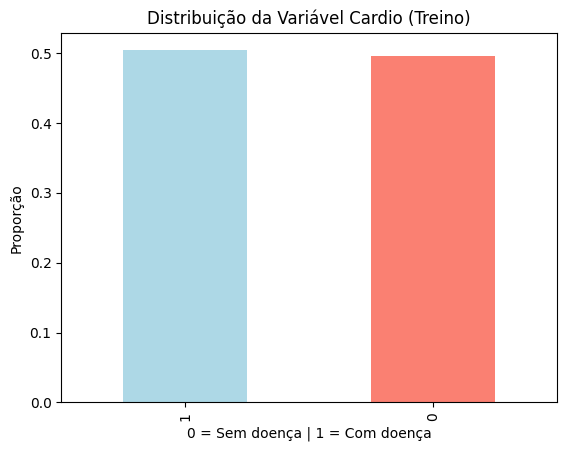

In [14]:
# C) Estão Balanceadors
y_train.value_counts(normalize=True).plot(kind='bar', title='Distribuição da Variável Cardio (Treino)', color=['lightblue', 'salmon'])
plt.xlabel('0 = Sem doença | 1 = Com doença')
plt.ylabel('Proporção')
plt.show()

In [15]:
# D)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\n🔎 Exemplo de X_train:")
print(X_train.head())

print("\n🎯 Exemplo de y_train:")
print(y_train.head())

X_train shape: (8000, 9)
X_test shape: (2000, 9)
y_train shape: (8000,)
y_test shape: (2000,)

🔎 Exemplo de X_train:
           age  gender    height    weight  cholesterol      gluc  smoke  \
9254  0.100380       1 -1.256107  0.321506            1 -0.392723      0   
1561 -0.193935       2  0.088091 -0.640578            1 -0.392723      0   
1670  1.424796       1 -0.278509 -0.090816            1 -0.392723      0   
6087  1.277639       2  1.065689  1.764633            1 -0.392723      1   
6669  1.277639       1 -0.034109  0.252786            1 -0.392723      0   

      alco  active  
9254     0       1  
1561     0       1  
1670     0       0  
6087     0       1  
6669     0       1  

🎯 Exemplo de y_train:
9254    0
1561    0
1670    1
6087    1
6669    0
Name: cardio_disease, dtype: int64


# Análise:

Tudo indo como o esperado até agora

# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [16]:
# A)

logistic_cardio = LogisticRegression(random_state = 0)
logistic_cardio.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
# B)

logistic_cardio.intercept_


array([-0.66262743])

In [20]:
logistic_cardio.coef_

array([[ 0.44191094,  0.02263628, -0.07857154,  0.35163962,  0.60209098,
        -0.06962615, -0.09616967, -0.03039666, -0.18825054]])

In [22]:
# C)

previsoes = logistic_cardio.predict(X_test)
relatorio = classification_report(y_test, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      1001
           1       0.67      0.62      0.64       999

    accuracy                           0.65      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.66      0.65      0.65      2000



# D)

Com base nas métricas acima, o modelo demonstra potencial de previsão, mas ainda possui margem de melhoria.

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [23]:
# A)

previsoes_teste = logistic_cardio.predict(X_test)

In [24]:
# B)

relatorio_teste = classification_report(y_test, previsoes_teste)
print("Relatório de Classificação (Teste):")
print(relatorio_teste)

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.64      0.69      0.67      1001
           1       0.67      0.62      0.64       999

    accuracy                           0.65      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.66      0.65      0.65      2000



In [25]:
# C)
fpr, tpr, thresholds = roc_curve(y_test, previsoes_teste)

# Calculando AUC
roc_auc = roc_auc_score(y_test, previsoes_teste)
print("AUC: {:.2f}".format(roc_auc))

AUC: 0.65


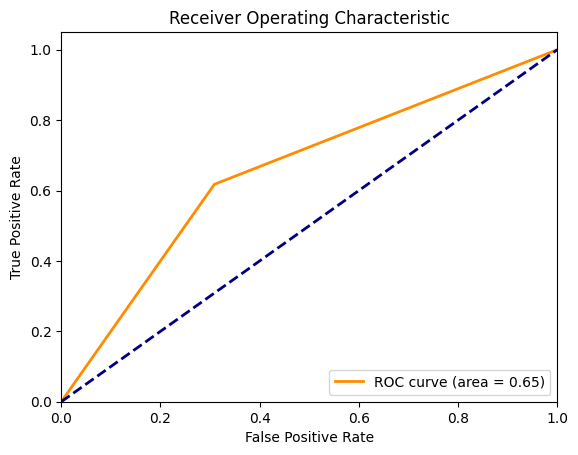

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Análise:

A curva ROC mostra que o modelo tem desempenho médio, com o AUC de 0.65. Abrindo possibilidades para aprimoramentos futuros.

# 7) Explique:

A) Explique com suas palavras regressão logistica.

Resposta: A Regressão Logística é usada para prever se algo vai acontecer ou não, com opções binárias, como sim ou não. Ela dá um resultado entre 0 e 1, mostrando a chance de isso acontecer.

B) Explique porque a regressão logistica é um modelo de classificação.

Resposta: É um modelo de classificação porque seu objetivo é separar os dados em categorias, como "sim" ou "não", "positivo" ou "negativo". Mesmo calculando uma probabilidade, no fim ela classifica o resultado em uma das classes.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.

Resposta: A Regressão Logística se parece com a Linear porque as duas tentam mostrar como uma coisa influencia a outra. A diferença é que a Linear dá um número como resposta, e a Logística mostra a chance de algo acontecer, como sim ou não.
